In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

cebollitas = pd.read_csv('partidos_cebollitas.csv')
cebollitas.head()


,fecha_partido,equipo_local,equipo_visitante,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante,estadio
0,2023-01-01,Atlético Python,Cebollitas FC,2,0,54,46,12,6,Python Arena
1,2023-01-08,NumPy City,Atlético Python,1,5,60,40,12,3,Estadio ML
2,2023-01-15,Cebollitas FC,Data United,1,0,55,45,10,7,Python Arena
3,2023-01-22,Atlético Python,Data United,2,3,57,43,3,3,Campo Pandas
4,2023-01-29,Data United,Cebollitas FC,5,3,52,48,7,12,Estadio ML


In [3]:
# Normalizar los datos con MinMaxScaler permite escalar los valores a un rango específico, generalmente entre 0 y 1.

scaler_norm = MinMaxScaler() # Instanciamos el objeto MinMaxScaler

cebollitas["tiros_arco_local_norm"] = scaler_norm.fit_transform(cebollitas[["tiros_arco_local"]]) # Aplicamos el escalador a la columna "tiros_arco_local" y creamos una nueva columna con los valores normalizados
cebollitas["tiros_arco_visitante_norm"] = scaler_norm.fit_transform(cebollitas[["tiros_arco_visitante"]]) #fit_transform ajusta el escalador a los datos y luego transforma los datos

cebollitas[['tiros_arco_local', 'tiros_arco_local_norm']].head(9)

,tiros_arco_local,tiros_arco_local_norm
0,12,1.000000
1,12,1.000000
2,10,0.777778
3,3,0.000000
4,7,0.444444
5,8,0.555556
6,4,0.111111
7,5,0.222222
8,9,0.666667


In [4]:
# Estandarizar los datos con StandardScaler permite centrar los datos alrededor de la media con una desviación estándar de 1.

scaler_std = StandardScaler()

cebollitas["posesion_local_std"] = scaler_std.fit_transform(cebollitas[["posesion_local (%)"]]) 
cebollitas["posesion_visitante_std"] = scaler_std.fit_transform(cebollitas[["posesion_visitante (%)"]])

cebollitas[['posesion_local (%)', 'posesion_local_std']].head(9)

,posesion_local (%),posesion_local_std
0,54,0.624415
1,60,1.623479
2,55,0.790926
3,57,1.123947
4,52,0.291394
5,60,1.623479
6,49,-0.208138
7,56,0.957436
8,60,1.623479


Text(0.5, 1.0, 'Distribución de Posesión Local Estandarizada')

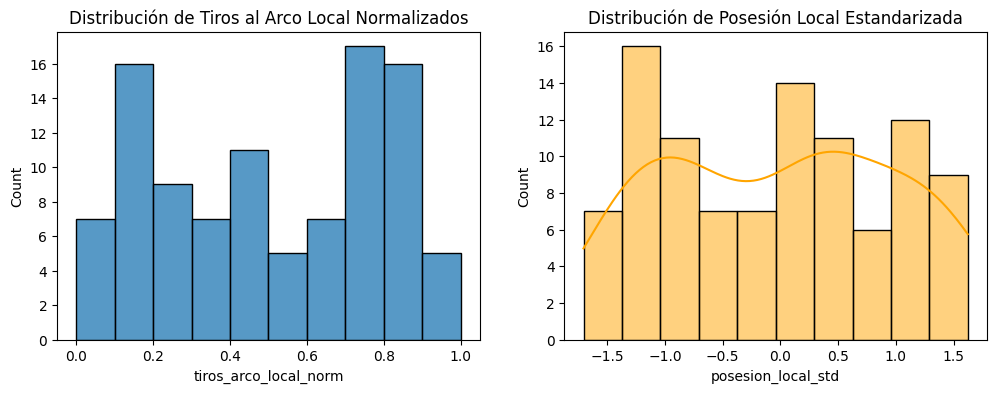

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(12, 4)) # Creamos una figura con 1 fila y 2 columnas para los gráficos

sns.histplot(cebollitas['tiros_arco_local_norm'], bins=10, ax=ax[0]) # Histograma de la columna "tiros_arco_local_norm" con 10 bins, los bins son las barras del histograma
ax[0].set_title('Distribución de Tiros al Arco Local Normalizados')

sns.histplot(cebollitas['posesion_local_std'], bins=10, kde=True, ax=ax[1], color='orange')
ax[1].set_title('Distribución de Posesión Local Estandarizada')

